In [1]:
from util_kw import *
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import nltk
import seaborn as sns

In [2]:
# give me a list of words, and i shall return only the verbs and adjectives
# defined as per nltk.pos_tag
# from https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
pos_symbols = ('VB','VBD','VBG','VBN','VBP','VBP','VBZ','JJ','JJR','JJS')
def filter_verb_adjective(alist):
    words_with_pos = [nltk.pos_tag([x])[0] for x in alist]
    return map(lambda x: x[0], filter(lambda x: x[1] in pos_symbols, words_with_pos))

In [3]:
wvm = Word2Vec.load('./word2vec_models/IN-indianexpress-india_with_phraser').wv

In [4]:
plt.rcParams["figure.figsize"] = (26,10)
font = {'weight' : 'bold',
        'size'   : 14}
matplotlib.rc('font', **font)

In [5]:
# for each word in manually defined negative list,
# 1. get the topn word2vec words/phrases
# 2. filter to keep only those words which have adjective or verb POS tag
# 3. retain only unique words
# 4. create DataFrame with columns generated from column_seed, by picking only verbs and adjs from similar words
def create_dataframe(row_words, column_seed, wvm, topn=30):
    column_words = []
    for nkw in column_seed:
        elist1 = filter_verb_adjective(map(lambda x: x[0], wvm.most_similar_cosmul(nkw, topn=topn)))
        column_words.extend(elist1)
        print (elist1)
    column_words = list(set(column_words))
    #print (column_words)
    permut1 = list(itertools.chain(itertools.product(column_words, row_words)))
    
    df = pd.DataFrame(columns=column_words, index=row_words)
    
    for w1, w2 in permut1:
        l1 = get_words(wvm, w1)
        l2 = get_words(wvm, w2)
        thissim = similarity(l1,l2,wvm)
        df[w1][w2] = thissim
    
    return df

[u'caring', u'hatred', u'believing', u'rational', u'oppressed']
[u'treated', u'medical', u'suffering', u'psychological', u'treating', u'cured']
[u'getting_married', u'unmarried', u'stalked', u'allegedly_molested']
[]
[u'caring', u'dignified', u'natural', u'essential', u'conscious', u'productive', u'preserving', u'sustainable', u'psychological', u'evolved', u'balanced', u'humble']
[u'prosperous', u'socio_economic', u'sustainable', u'inclusive', u'harmonious', u'productive', u'achieving', u'preserving', u'emphasising']


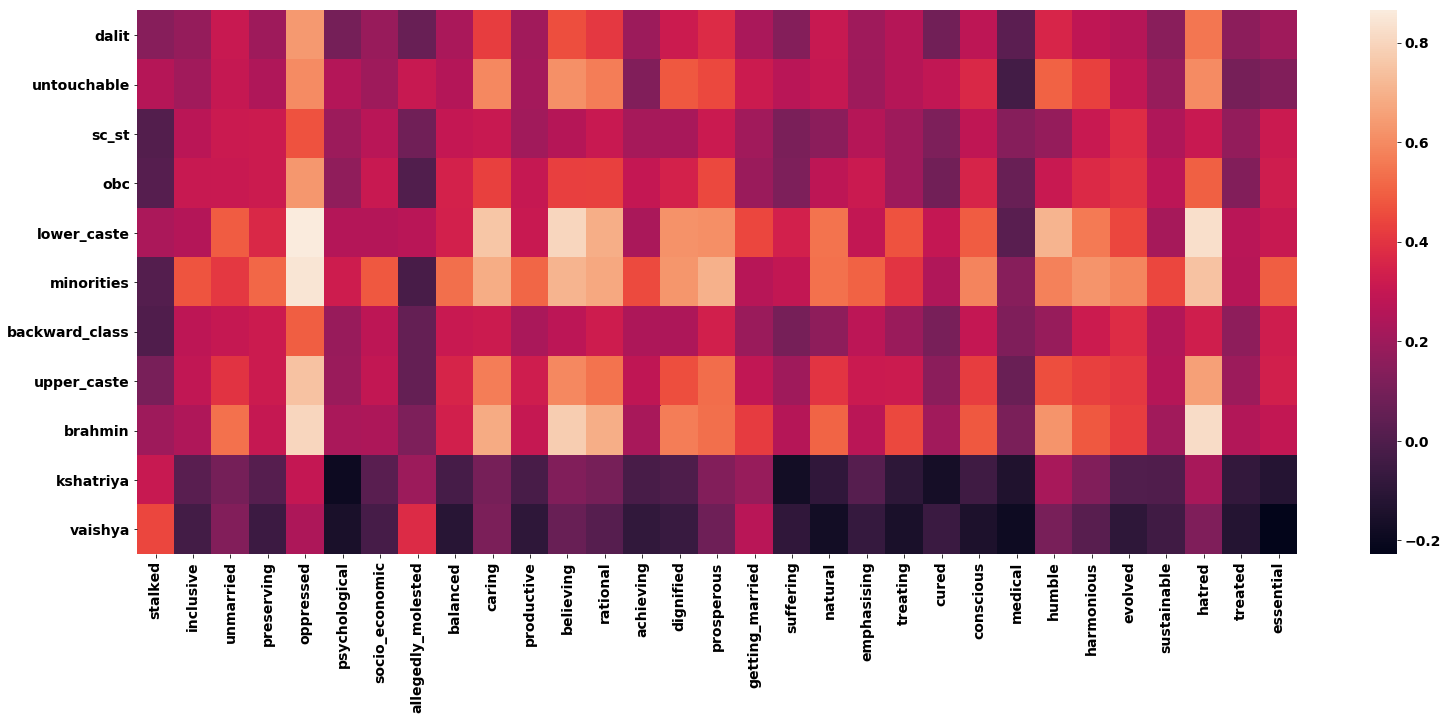

In [6]:
simdf = create_dataframe(lower_caste_keywords+upper_caste_keywords, positive_aspect, wvm, 35)
simdf.fillna(value=0, inplace=True)

In [ ]:
sns.heatmap(simdf)
plt.show()

[u'rich', u'deprived', u'neglected', u'marginalised', u'suffering', u'rural']
[u'stone_pelting', u'widespread', u'lynching', u'uprising']
[u'infected', u'epidemic', u'neurological', u'diagnosed']
[u'uncontrolled', u'invisible', u'choking', u'excessive', u'avoidable', u'abnormal', u'measured', u'injected', u'realistic', u'injurious', u'emanating', u'vulnerable', u'hazardous']
[u'incident_happened', u'fir_registered', u'killing']
[u'trafficking', u'criminal', u'crime_committed', u'guilty']


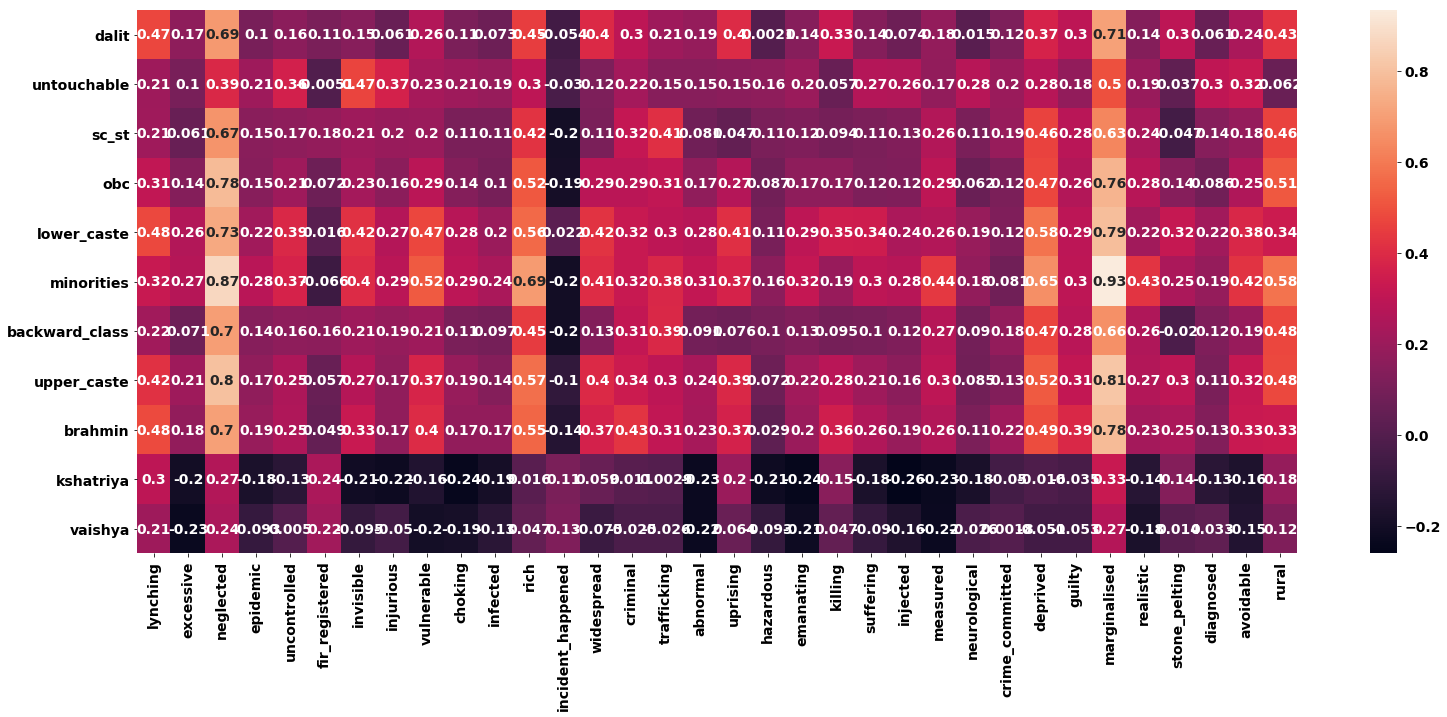

In [8]:
simdf2 = create_dataframe(lower_caste_keywords+upper_caste_keywords, negative_aspect, wvm, 35)
simdf2.fillna(value=0, inplace=True)

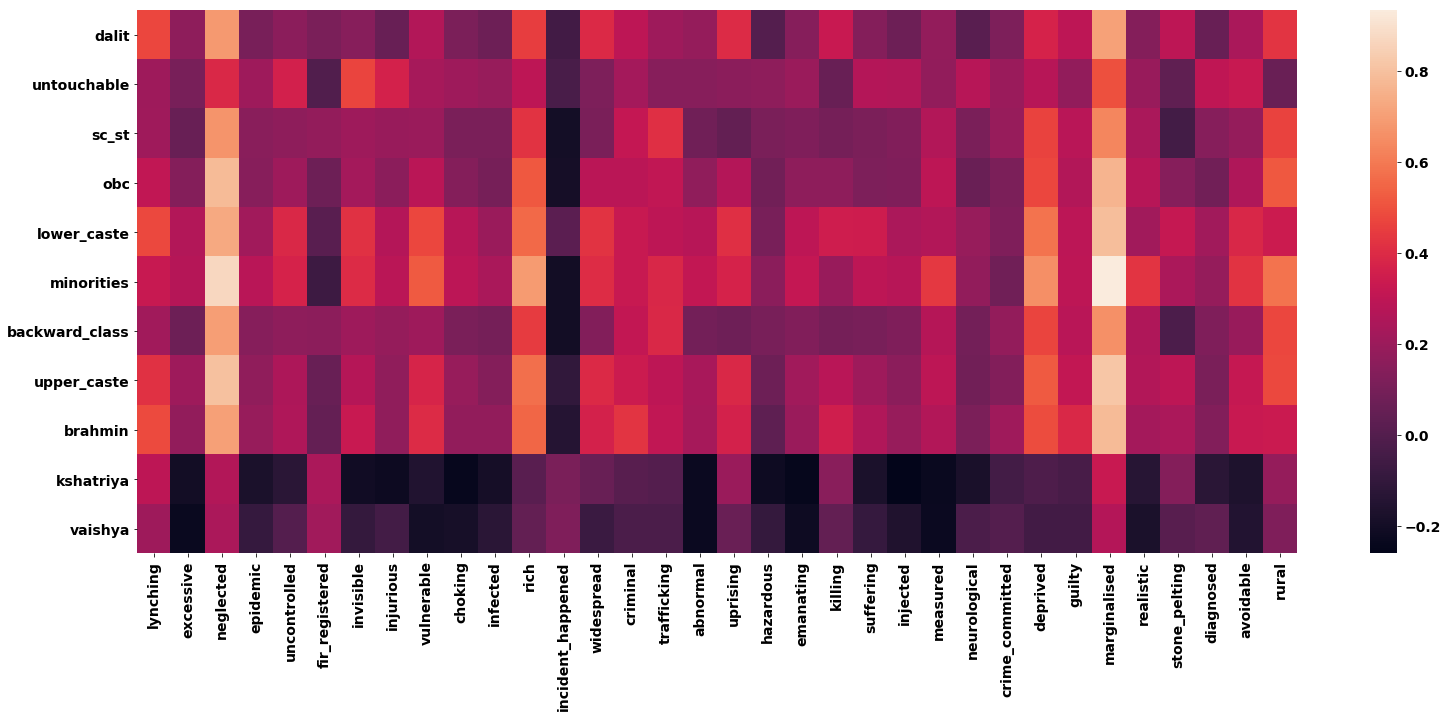

In [10]:
sns.heatmap(simdf2, annot=False)
plt.show()